# Full example

In [1]:
push!(LOAD_PATH,"C:/JMB/DINEOF.jl/src","."); using DINEOF
using PyPlot
using LinearAlgebra
using Arpack
using Statistics
using Optim
using NCDatasets
using FTPClient

┌ Info: Recompiling stale cache file C:\Users\jmbeckers\.julia\compiled\v1.2\DINEOF.ji for DINEOF [top-level]
└ @ Base loading.jl:1240


## Get a nice data cube and look at it

In [2]:
fname="c:/Users/JMBECKERS/Downloads/SPMCT.nc"


"c:/Users/JMBECKERS/Downloads/SPMCT.nc"

In [3]:
ds=Dataset(fname)

Dataset: c:\Users\JMBECKERS\Downloads\SPMCT.nc
Group: /

Dimensions
   time = 366
   lat = 124
   lon = 115

Variables
  time   (366)
    Datatype:    Float64
    Dimensions:  time
    Attributes:
     units                = seconds since 1970-1-1
     calendar             = gregorian
     standard_name        = time

  coverage   (366)
    Datatype:    Float64
    Dimensions:  time
    Attributes:
     long_name            = Percentage of valid pixels
     valid_min            = 0.0
     valid_max            = 100.0

  lat   (124)
    Datatype:    Float64
    Dimensions:  lat
    Attributes:
     units                = degrees north
     standard_name        = latitude

  lon   (115)
    Datatype:    Float64
    Dimensions:  lon
    Attributes:
     units                = degrees east
     standard_name        = longitude

  spm   (115 × 124 × 366)
    Datatype:    Float64
    Dimensions:  lon × lat × time
    Attributes:
     _FillValue           = -999.0
     units                = 

In [4]:
spm=ds["logspm"][:]
spm[ismissing.(spm)].=NaN

3495799-element view(reshape(::Array{Union{Missing, Float64},3}, 5219160), [1, 57, 58, 59, 60, 61, 62, 63, 75, 116  …  5219151, 5219152, 5219153, 5219154, 5219155, 5219156, 5219157, 5219158, 5219159, 5219160]) with eltype Union{Missing, Float64}:
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
   ⋮
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN

In [5]:
meanspm=mean(spm[.!isnan.(spm)])

0.3915928944267166

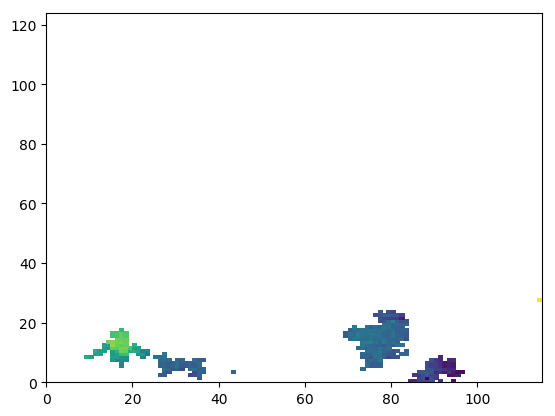

PyObject <matplotlib.collections.PolyCollection object at 0x0000000035D036A0>

In [6]:
pcolor(spm[:,:,10]')

## Make a first analysis with only a limited number of EOFs

Raw data variance and mean: 0.19450120556381156 and 0.3915928944267166
Number of missing points (including possible masks): 3495799 out of 5219160
Number of data points before elimination of low coverage regions is 1723361 and cv fraction 0.010206219126462766
Number of data points after elimination of low coverage regions is 1654062 and cv fraction 0.010174346548073773
(mean(X2D), meanmatrix, meanmiss, datamean) = (-0.0003422469995415135, -0.004255329461211352, -0.0007678133760978077, 0.3915928944267166)
svds! matrix size: (11612, 257)
svds!: variance and mean of the entry matrix: 0.19317892511080453 , -0.0003422469995415135 ; intial variance at points to fill in: 0.19320914433457229 
Eof loop 1 with root mean squared misfit: 0.2970809908770308 
Eof loop 2 with root mean squared misfit: 0.15873911626093337 
Eof loop 3 with root mean squared misfit: 0.14407011572174755 
Eof loop 4 with root mean squared misfit: 0.13520153302001248 
Convergence for 5 eofs, relative change 0.0048488580746

┌ Warning: Initial Variance has been increased for filtered matrix  by factor 1.0112789325642215
└ @ DINEOF C:\JMB\DINEOF.jl\src\DINEOF_svds!.jl:295


musquare optimization: Both OI-EOF error and CV coherence
tutu = Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [0.005091, 1.018267]
 * Minimizer: 1.003323e+00
 * Minimum: 3.199477e+02
 * Iterations: 8
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.0e-02*|x|+1.0e-07): true
 * Objective Function Calls: 9
CV estimator from EOF 0.012143928305551895 is now 0.010730378349952614 if OI is used
Optimal musquare is 1.0033230931719255
Relative error on reconstruction 3.080580378961629e-5, relative error on CV estimator 0.013548896754800201
The two criteria to compare OI and EOF are: reconstruction 91.93326735649126, closest CV 228.01438348653258
Estimated musquare 0.010182671578601846 was inflated by factor 98.53240236877883 into 1.0033230931719255
This optimal value provides OI interpolation CV estimator 0.010730378349952614
Mean error variance of reconstruction: 0.005518537547429379 
614.602837 seconds (3.98 G allocations: 249.794 GiB, 8.04% gc ti

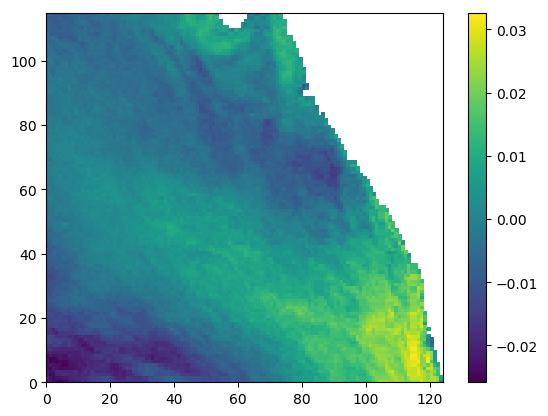

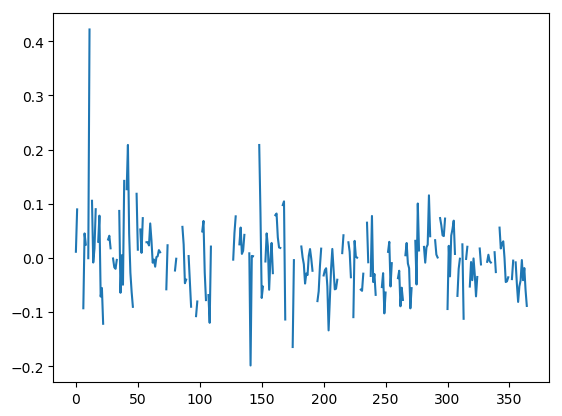

(S, sum(S .^ 2), offset) = ([563.4387951816964, 458.76120819304526, 125.54132414400684, 111.38457148463941, 92.58413008902755, 83.23337178787912, 62.499094720503685, 58.95124865974022, 48.56286858381251, 40.883563133459], 583003.088713714, 0.3873375649655052)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000033DF0898>

In [7]:
@time XA,offset,U,S,V,cvEOF,cvarray,errmap,musquare=DINEOFrun(spm,[1,1,2];eofmax=10)
@show S,sum(S.^2),offset

pcolor(U[:,:,4]),colorbar()
figure()
plot(V[:,4])

Raw data variance and mean: 0.19450120556381156 and 0.3915928944267166
Number of missing points (including possible masks): 3495799 out of 5219160
Number of data points before elimination of low coverage regions is 1723361 and cv fraction 0.010157477162358902
Number of data points after elimination of low coverage regions is 1675205 and cv fraction 0.010125924886804898
(mean(X2D), meanmatrix, meanmiss, datamean) = (-0.00030627525711895965, -0.005959117390170755, -0.0006912037195712445, 0.3915928944267166)
svds! matrix size: (25932, 116)
svds!: variance and mean of the entry matrix: 0.1924315715734237 , -0.00030627525711895965 ; intial variance at points to fill in: 0.1925955980894183 
Eof loop 1 with root mean squared misfit: 0.28642807562636713 
Eof loop 2 with root mean squared misfit: 0.158342018190664 
Eof loop 3 with root mean squared misfit: 0.11556143682996457 
Eof loop 4 with root mean squared misfit: 0.103065278547138 
Eof loop 5 with root mean squared misfit: 0.09647657667649

┌ Warning: Initial Variance has been increased for filtered matrix  by factor 1.311318329727616
└ @ DINEOF C:\JMB\DINEOF.jl\src\DINEOF_svds!.jl:295



tutu = Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [0.002608, 0.521590]
 * Minimizer: 5.156488e-01
 * Minimum: 5.171980e+02
 * Iterations: 8
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.0e-02*|x|+1.0e-07): true
 * Objective Function Calls: 9
CV estimator from EOF 0.006868532572692828 is now 0.005672427796640762 if OI is used
Optimal musquare is 0.5156488478618355
Relative error on reconstruction 9.253485267765578e-7, relative error on CV estimator 0.030325678381492627
The two criteria to compare OI and EOF are: reconstruction 2.783552007578885, closest CV 514.4144823852595
Estimated musquare 0.0052159049982790145 was inflated by factor 98.86085885996268 into 0.5156488478618355
This optimal value provides OI interpolation CV estimator 0.005672427796640762
Mean error variance of reconstruction: 0.000586858986604198 


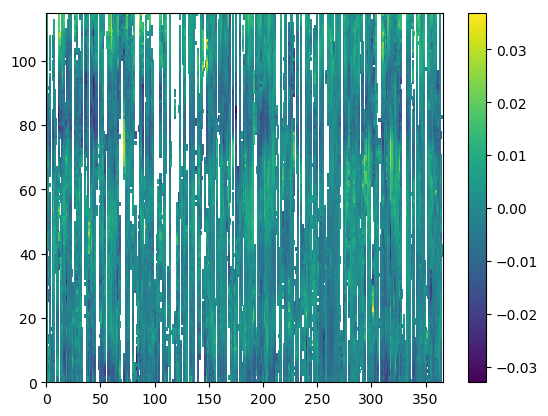

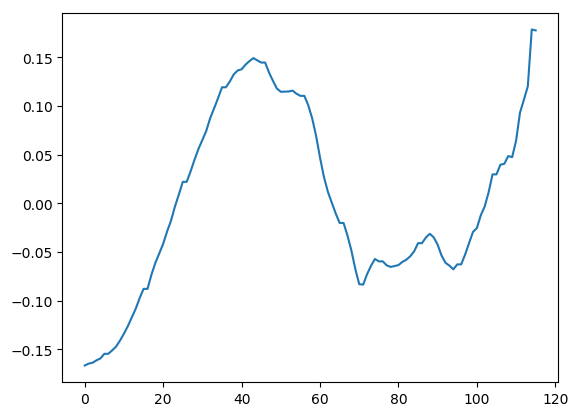

590.426508 seconds (4.25 G allocations: 277.877 GiB, 7.20% gc time)
(S, sum(S .^ 2), offset) = ([679.528666281419, 443.24454541468225, 254.13616811452204, 112.82689825084488, 87.73749233265093, 77.39095318663261, 67.32818873194981, 48.84306214448941, 43.99073839797604, 31.351829097671327], 759064.1154170132, 0.38563377703654583)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000022B8B00>

In [8]:
@time XA,offset,U,S,V,cvEOF,cvarray,errmap,musquare=DINEOFrun(spm,[1,2,1];eofmax=10)
@show S,sum(S.^2),offset

pcolor(U[:,:,4]),colorbar()
figure()
plot(V[:,4])

Raw data variance and mean: 0.19450120556381156 and 0.3915928944267166
Number of missing points (including possible masks): 3495799 out of 5219160
Number of data points before elimination of low coverage regions is 1723361 and cv fraction 0.010209700695327329
Number of data points after elimination of low coverage regions is 1684373 and cv fraction 0.010159269947927211
(mean(X2D), meanmatrix, meanmiss, datamean) = (9.746176904211807e-6, -0.0033854961854697515, 2.0678741737716323e-5, 0.3915928944267166)
svds! matrix size: (27704, 115)
svds!: variance and mean of the entry matrix: 0.1935744586635901 , 9.746176904211807e-6 ; intial variance at points to fill in: 0.19361748069896603 
Eof loop 1 with root mean squared misfit: 0.2773960927917641 
Eof loop 2 with root mean squared misfit: 0.15651977080724475 
Eof loop 3 with root mean squared misfit: 0.12382122179635359 
Eof loop 4 with root mean squared misfit: 0.10857365808155456 
Eof loop 5 with root mean squared misfit: 0.0990488154923885

┌ Warning: Initial Variance has been increased for filtered matrix  by factor 1.3653266356503946
└ @ DINEOF C:\JMB\DINEOF.jl\src\DINEOF_svds!.jl:295


tutu = Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [0.002641, 0.528139]
 * Minimizer: 5.221230e-01
 * Minimum: 6.012447e+02
 * Iterations: 8
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.0e-02*|x|+1.0e-07): true
 * Objective Function Calls: 9
CV estimator from EOF 0.0069361366917832104 is now 0.005636691665061771 if OI is used
Optimal musquare is 0.5221230304771642
Relative error on reconstruction 2.040956249552412e-7, relative error on CV estimator 0.035097851818438656
The two criteria to compare OI and EOF are: reconstruction 0.6502404972824003, closest CV 600.5944403171222
Estimated musquare 0.0052813928358876345 was inflated by factor 98.8608586222335 into 0.5221230304771642
This optimal value provides OI interpolation CV estimator 0.005636691665061771
Mean error variance of reconstruction: 0.0004367945712731533 


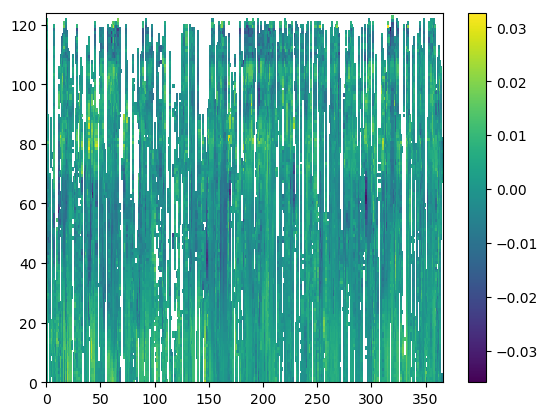

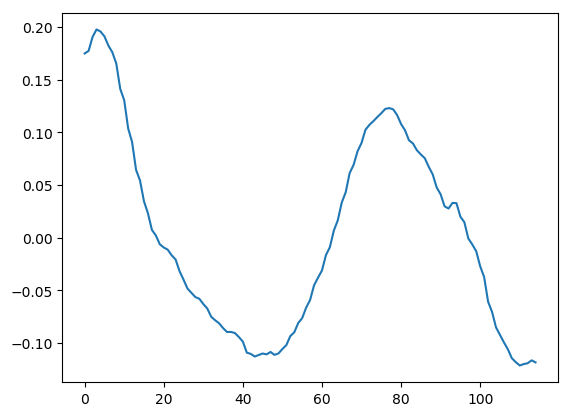

638.267577 seconds (4.69 G allocations: 304.358 GiB, 6.92% gc time)
(S, sum(S .^ 2), offset) = ([769.9605723478893, 401.86739850225064, 204.90142127113333, 128.6556726033971, 116.15507870528627, 77.67455899066064, 58.78884397843134, 55.744453332465085, 45.165565576551, 31.976519444175953], 842024.9012679129, 0.38820739824124684)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000001F9A208>

In [9]:
@time XA,offset,U,S,V,cvEOF,cvarray,errmap,musquare=DINEOFrun(spm,[2,1,1];eofmax=10)
@show S,sum(S.^2),offset

pcolor(U[:,:,4]),colorbar()
figure()
plot(V[:,4])

## Decide which directions to collapse and make a full analysis

In this example the classical space time decomposition seems to work. So lets try and add a time filter onto it with cross-validation by clouds.



Raw data variance and mean: 0.19450120556381156 and 0.3915928944267166
Number of missing points (including possible masks): 3495799 out of 5219160
Number of data points before elimination of low coverage regions is 1723361 and cv fraction 0.013085476577455332
Number of data points after elimination of low coverage regions is 1722390 and cv fraction 0.013091111769111525
(mean(X2D), meanmatrix, meanmiss, datamean) = (-9.17081734050755e-5, -0.0003891675088263338, -0.0001537162400868891, 0.3915928944267166)
svds! matrix size: (11666, 366)
svds!: variance and mean of the entry matrix: 0.19430011064227393 , -9.17081734050755e-5 ; intial variance at points to fill in: 0.1943180314411974 
Eof loop 1 with root mean squared misfit: 0.2851401397908744 
Eof loop 2 with root mean squared misfit: 0.18483191715995284 
Convergence for 3 eofs, relative change 0.0043486845907953035 after 10 iterations
Eof loop 3 with root mean squared misfit: 0.17071203005447236 
Convergence for 4 eofs, relative change 

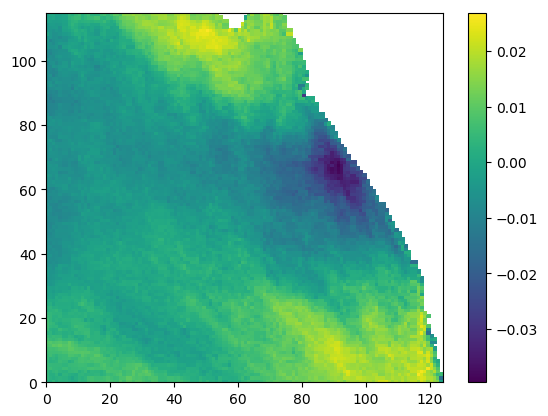

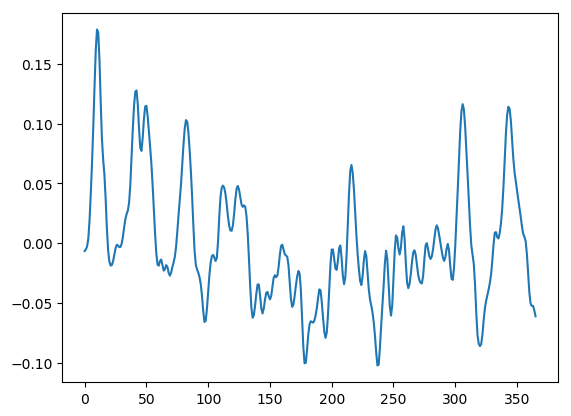


1282.830062 seconds (8.16 G allocations: 646.093 GiB, 9.23% gc time)
(S, sum(S .^ 2), offset) = ([670.4303708733843, 511.7339025279885, 122.1633038601631, 105.93524797046199, 91.99227689081476, 86.95197502184499, 71.71054614187048, 69.33262838310748, 57.30669183267999, 52.462561007478115, 46.76480029959082], 771690.5832961033, 0.39120372691789024)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000036030668>

In [10]:
@time XA,offset,U,S,V,cvEOF,cvarray,errmap,musquare=DINEOFrun(spm,[1,1,2];minimumcoverage=[0.05,0.01],filter="pmf",filterrepetitions=3,cvmethod="CopyMask",svdmeth="eig")
@show S,sum(S.^2),offset

pcolor(U[:,:,4]),colorbar()
figure()
plot(V[:,4])

## Apply QC and take out suspect points (put NaN)

In [11]:
OO=DINEOF_pmQC(spm,XA,errmap,musquare,4)
@show mean(OO[.!isnan.(OO)])

mean(OO[.!(isnan.(OO))]) = 0.40817868446471184


0.40817868446471184

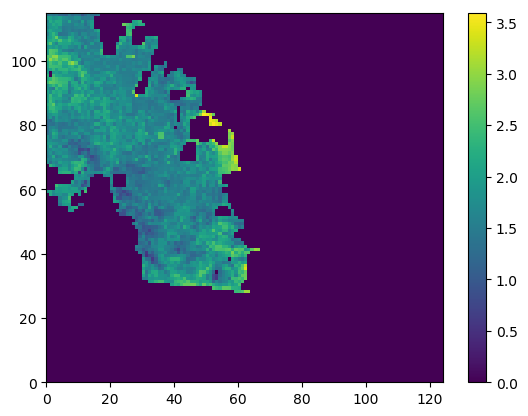

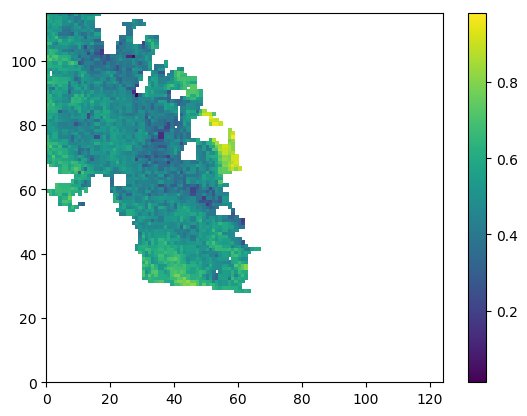

(PyObject <matplotlib.collections.PolyCollection object at 0x000000003B461B70>, PyObject <matplotlib.colorbar.Colorbar object at 0x000000003B675CC0>)

In [12]:
pcolor(OO[:,:,250]),colorbar()
figure()
pcolor(spm[:,:,250]),colorbar()

In [13]:
@show mean(XA[.!isnan.(XA)]),mean(spm[.!isnan.(spm)]),offset

(mean(XA[.!(isnan.(XA))]), mean(spm[.!(isnan.(spm))]), offset) = (0.44052688749131014, 0.3915928944267166, 0.39120372691789024)


(0.44052688749131014, 0.3915928944267166, 0.39120372691789024)

In [14]:
sum(OO.>5)/sum(.!isnan.(spm))*100

0.00249512435293592

## Redo the decomposition but by restarting

With a time filter you can accept possibly empty images (so coverage for fixed time can be zero). But allow for more iterations for the final reconstruction and maybe use the pmf instead of vpmf

In [15]:
sum(isnan.(XA))

949404

In [16]:
prod(size(XA))

5219160

In [17]:
spmf=deepcopy(spm)
spmf[OO.>5].=NaN
@show sum(isnan.(spmf)),sum(isnan.(spm))
@time XA,offset,U,S,V,cvEOF,cvarray,errmap,musquare=DINEOFrun(spmf,[1,1,2];dineofmaxiter=20,restart=XA,eofstart=max(size(S)[1]-5,1),minimumcoverage=[0.05,0.01],filter="pmf",filterrepetitions=3,cvmethod="CopyMask",svdmeth="eig")
@show S,sum(S),offset

(sum(isnan.(spmf)), sum(isnan.(spm))) = (3495842, 3495799)
Raw data variance and mean: 0.1944959687566328 and 0.3916017735929475
Number of missing points (including possible masks): 3495842 out of 5219160
Number of data points before elimination of low coverage regions is 1723318 and cv fraction 0.01030279959937748
Using restart matrix
mean(restart2D[.!(isnan.(restart2D))]) = 0.048925113898362564
mean(restart2D[.!(isnan.(restart2D))]) = 0.048641057731771284
mean(restart2D[.!(isnan.(restart2D))]) = 0.048641057731771284
mean(restart2D[.!(isnan.(restart2D))]) = 0.04904152576492324
Number of data points after elimination of low coverage regions is 1722167 and cv fraction 0.01020516593338509
(mean(X2D), meanmatrix, meanmiss, datamean) = (0.049091309135795284, -0.0004004680331519647, 0.08243443620307586, 0.3916017735929475)
svds! matrix size: (11665, 365)
svds!: variance and mean of the entry matrix: 0.19033701526014038 , 0.049091309135795284 ; intial variance at points to fill in: 0.1860232

┌ Warning: You should subtract a mean value from your data
└ @ DINEOF C:\JMB\DINEOF.jl\src\DINEOF_svds!.jl:105


Convergence for 6 eofs, relative change 0.004855855171568633 after 8 iterations
Eof loop 6 with root mean squared misfit: 0.12368443392297504 
Convergence for 7 eofs, relative change 0.004318462106689394 after 8 iterations
Eof loop 7 with root mean squared misfit: 0.1396235841806726 
Convergence for 8 eofs, relative change 0.0049067374924262755 after 7 iterations
Eof loop 8 with root mean squared misfit: 0.14317394250460647 
Convergence for 9 eofs, relative change 0.004939781869596554 after 8 iterations
Eof loop 9 with root mean squared misfit: 0.14525146361906538 
Convergence for 10 eofs, relative change 0.004707065162454295 after 9 iterations
Eof loop 10 with root mean squared misfit: 0.14522032764670725 
Cross validation value (root mean squared misfit): 0.12368443392297504 for 6 EOFs
Estimation for musquare based on DeRozier type of analysis: 0.02273836557653738
Estimation of mean error variance of reconstuctions: 0.0074405263816906 
Explained variance  92.6393077199104 percent
mus

([669.3781402407534, 510.8539276747758, 120.2770101331124, 105.75952508404126, 91.82843180959696, 87.34125257464139], 1585.438287516921, 0.39120130555979554)

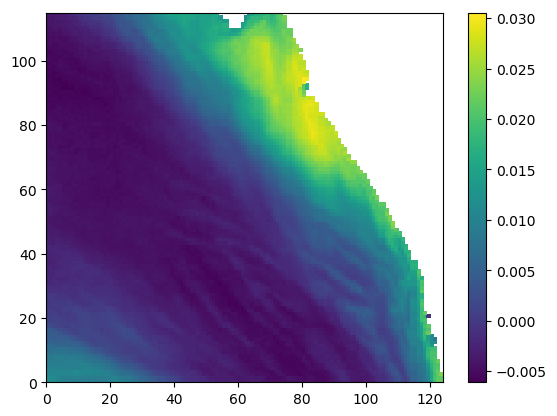

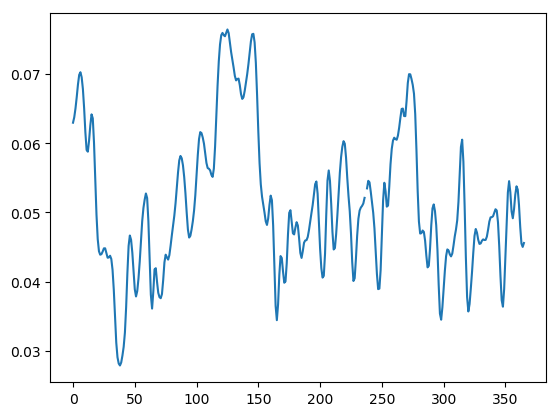

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000298F2BA8>

In [18]:
pcolor(U[:,:,1]),colorbar()
figure()
plot(V[:,1])

## Look at error field

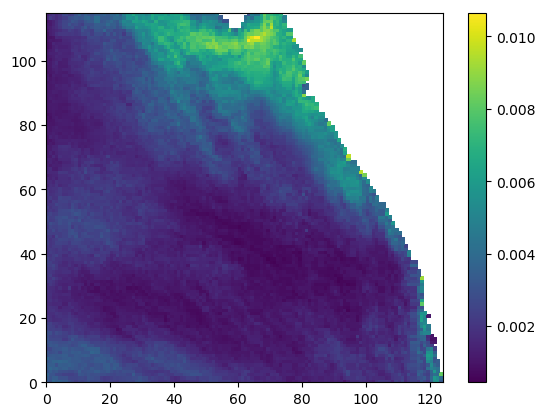

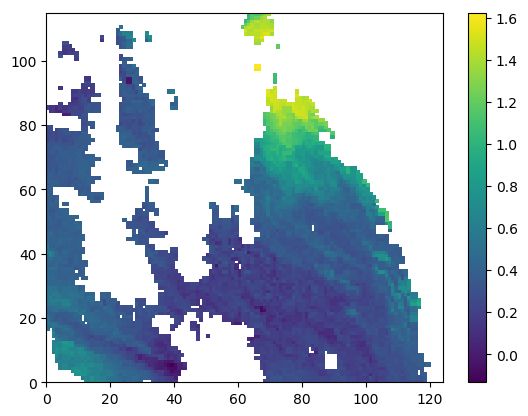

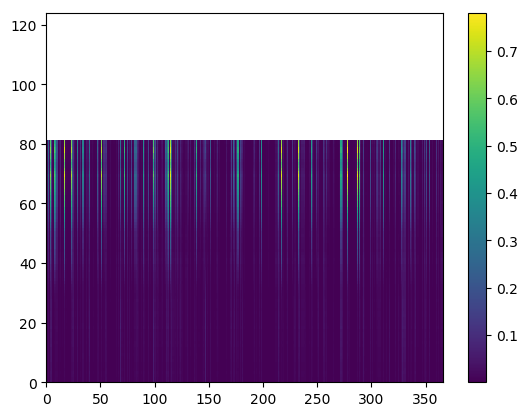

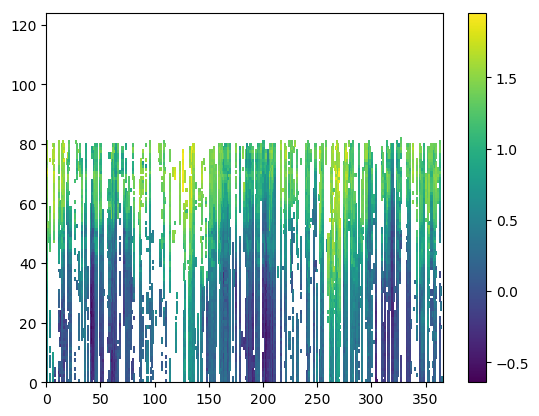

(PyObject <matplotlib.collections.PolyCollection object at 0x000000003CB20278>, PyObject <matplotlib.colorbar.Colorbar object at 0x00000000401DADA0>)

In [19]:
pcolor(errmap[:,:,340]),colorbar()
figure()
pcolor(spm[:,:,340]),colorbar()
figure()
pcolor(errmap[100,:,:]),colorbar()
figure()
pcolor(spm[100,:,:]),colorbar()



## Fuse the original data and the reconstruction to look at the effect

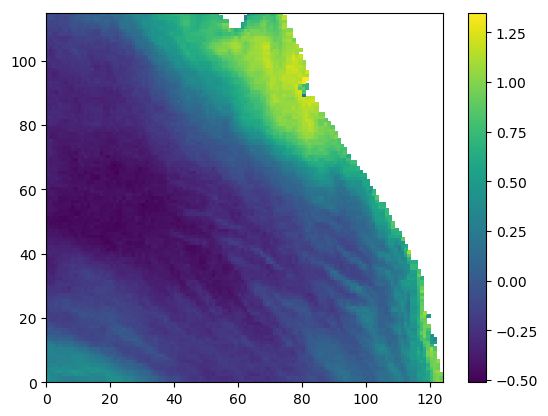

(PyObject <matplotlib.collections.PolyCollection object at 0x00000000402D43C8>, PyObject <matplotlib.colorbar.Colorbar object at 0x000000004ACD2C50>)

In [20]:
pcolor(XA[:,:,305]),colorbar()

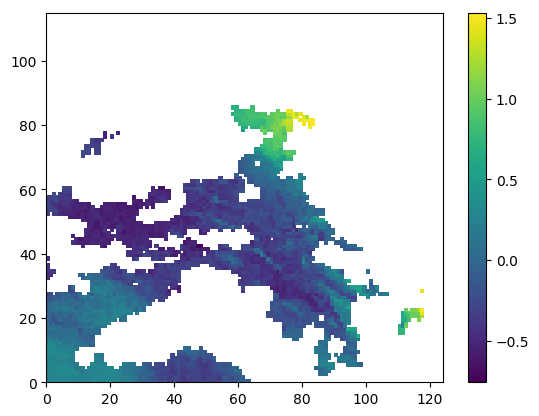

(PyObject <matplotlib.collections.PolyCollection object at 0x0000000054EBCCF8>, PyObject <matplotlib.colorbar.Colorbar object at 0x00000000551B6518>)

In [21]:
pcolor(spm[:,:,304]),colorbar()

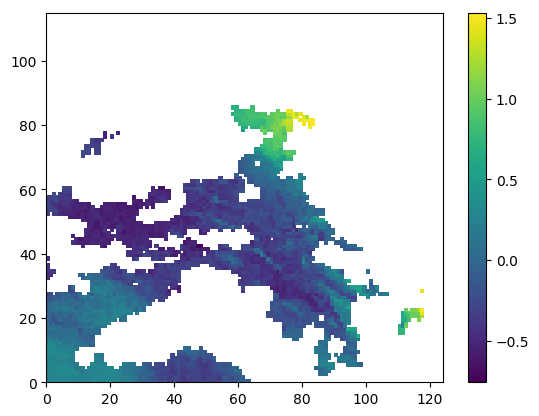

(PyObject <matplotlib.collections.PolyCollection object at 0x000000005523A748>, PyObject <matplotlib.colorbar.Colorbar object at 0x00000000554BCF28>)

In [22]:
pcolor(spmf[:,:,304]),colorbar()

In [23]:
DINEOF_fuse!(spmf,XA,4)

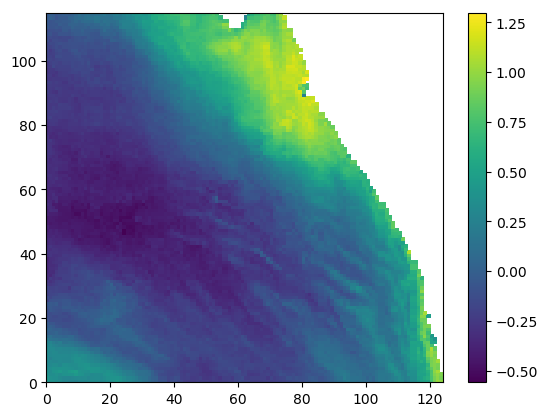

(PyObject <matplotlib.collections.PolyCollection object at 0x000000003B703358>, PyObject <matplotlib.colorbar.Colorbar object at 0x0000000029AB5160>)

In [24]:
pcolor(spmf[:,:,304]),colorbar()

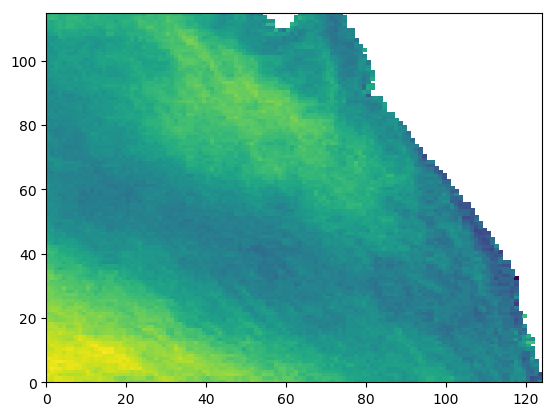

PyObject <matplotlib.collections.PolyCollection object at 0x000000003CA8B208>

In [25]:
pcolor(U[:,:,end])

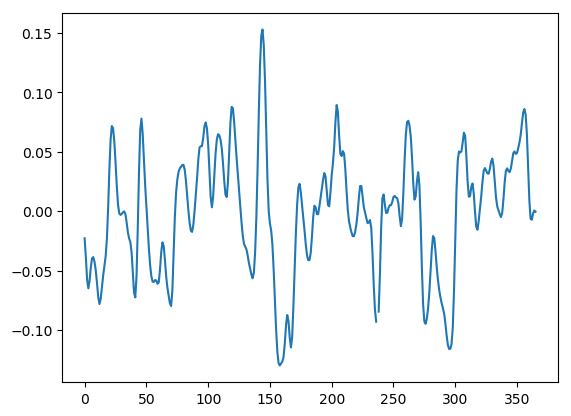

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002976BC88>

In [26]:
plot(V[:,end])

In [27]:
S

6-element Array{Float64,1}:
 669.3781402407534 
 510.8539276747758 
 120.2770101331124 
 105.75952508404126
  91.82843180959696
  87.34125257464139

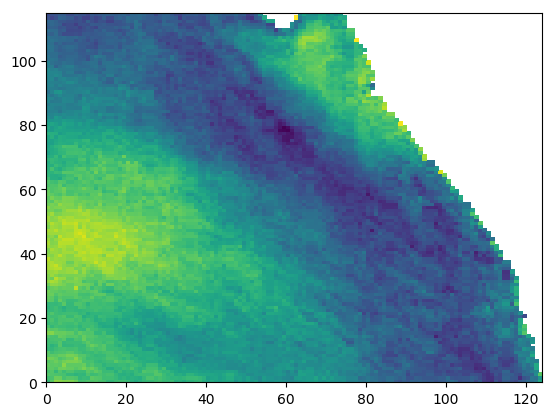

PyObject <matplotlib.collections.PolyCollection object at 0x0000000054EA1080>

In [28]:
pcolor(U[:,:,5])